<a href="https://colab.research.google.com/github/jaeyoonjeong9024/5weeks/blob/main/digit_ML%2BDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import time

In [31]:
# 1. 데이터 로드
print("=" * 60)
print("📚 Loading handwritten digits data...")
print("=" * 60)
digits = datasets.load_digits()
print(f"Total samples: {len(digits.images)}, Image size: 8×8\n")

📚 Loading handwritten digits data...
Total samples: 1797, Image size: 8×8



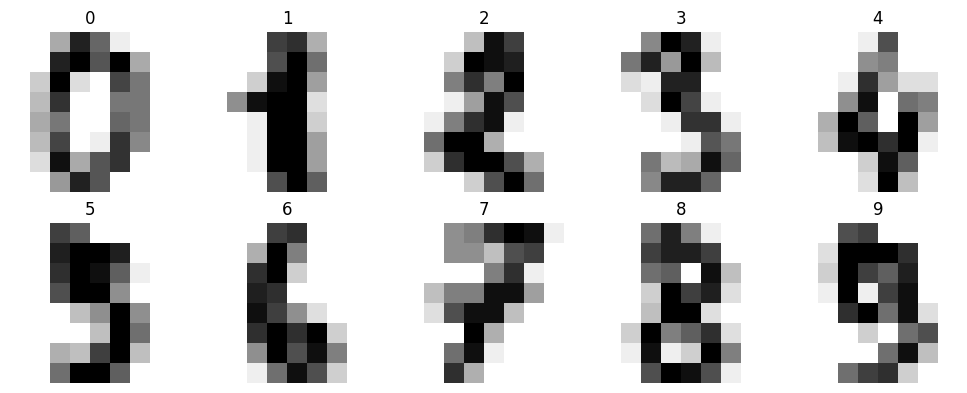

In [32]:
# 2. 데이터 시각화
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'{digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [33]:
# 3. 데이터 전처리
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, random_state=42)

# 딥러닝용 데이터
X_train_dl = X_train.reshape(-1, 8, 8, 1) / 16.0
X_test_dl = X_test.reshape(-1, 8, 8, 1) / 16.0
y_train_dl = to_categorical(y_train, 10)
y_test_dl = to_categorical(y_test, 10)

print(f"Train: {X_train.shape}, Test: {X_test.shape}\n")

Train: (1437, 64), Test: (360, 64)



In [34]:
# 4. 모델 학습
print("=" * 60)
print("🤖 Training Models")
print("=" * 60)
results = {}

# 머신러닝 모델 4개
models_ml = [
    ('KNN', KNeighborsClassifier(n_neighbors=6)),
    ('Logistic Regression', LogisticRegression(max_iter=100, solver='lbfgs')),
    ('Decision Tree', DecisionTreeClassifier(max_depth=15, random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42))
]

for name, model in models_ml:
    start = time.time()
    model.fit(X_train, y_train)
    acc = metrics.accuracy_score(y_test, model.predict(X_test))
    t = time.time() - start
    results[name] = (acc, t)
    print(f"[{name}] Accuracy: {acc:.4f} | Time: {t:.2f}s")

# 딥러닝 모델
print("\n🧠 Deep Learning")
start = time.time()
dnn = models.Sequential([
    layers.Flatten(input_shape=(8, 8, 1)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn.fit(X_train_dl, y_train_dl, epochs=20, batch_size=32,
                  validation_split=0.1, verbose=0)
_, dnn_acc = dnn.evaluate(X_test_dl, y_test_dl, verbose=0)
dnn_time = time.time() - start
results['DNN'] = (dnn_acc, dnn_time)
print(f"[DNN] Accuracy: {dnn_acc:.4f} | Time: {dnn_time:.2f}s")

🤖 Training Models
[KNN] Accuracy: 0.9889 | Time: 0.01s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Logistic Regression] Accuracy: 0.9694 | Time: 0.65s
[Decision Tree] Accuracy: 0.8417 | Time: 0.03s
[Random Forest] Accuracy: 0.9722 | Time: 0.50s

🧠 Deep Learning


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[DNN] Accuracy: 0.9694 | Time: 6.40s


In [35]:
# 5. 결과 비교
print("\n" + "=" * 60)
print("📊 Results Summary")
print("=" * 60)
print(f"{'Model':<25} {'Accuracy':<12} {'Time'}")
print("-" * 60)
for name, (acc, t) in results.items():
    print(f"{name:<25} {acc:<12.4f} {t:.2f}s")

best = max(results.items(), key=lambda x: x[1][0])
print(f"\n🏆 Best: {best[0]} ({best[1][0]:.4f})")




📊 Results Summary
Model                     Accuracy     Time
------------------------------------------------------------
KNN                       0.9889       0.01s
Logistic Regression       0.9694       0.65s
Decision Tree             0.8417       0.03s
Random Forest             0.9722       0.50s
DNN                       0.9694       6.40s

🏆 Best: KNN (0.9889)


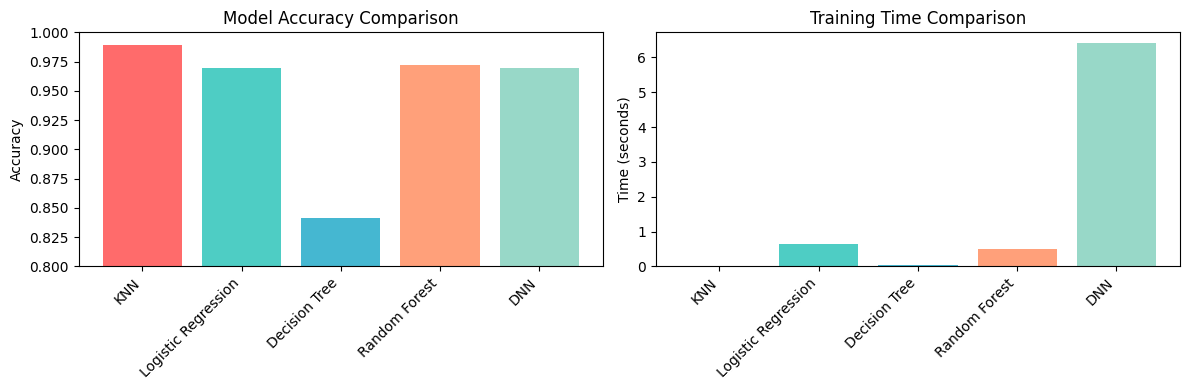

In [36]:
# 6. 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

models_list = list(results.keys())
accuracies = [results[m][0] for m in models_list]
times = [results[m][1] for m in models_list]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

axes[0].bar(models_list, accuracies, color=colors)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylim([0.8, 1.0])
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

axes[1].bar(models_list, times, color=colors)
axes[1].set_ylabel('Time (seconds)')
axes[1].set_title('Training Time Comparison')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

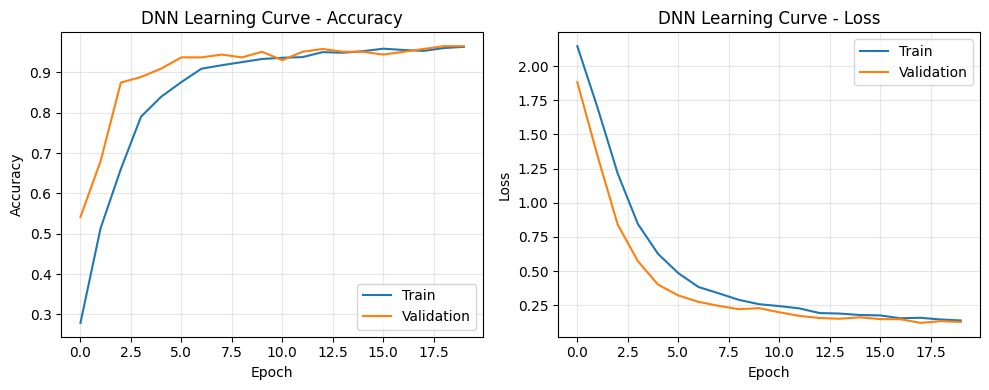

In [37]:
# 7. DNN 학습 곡선
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('DNN Learning Curve - Accuracy')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DNN Learning Curve - Loss')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

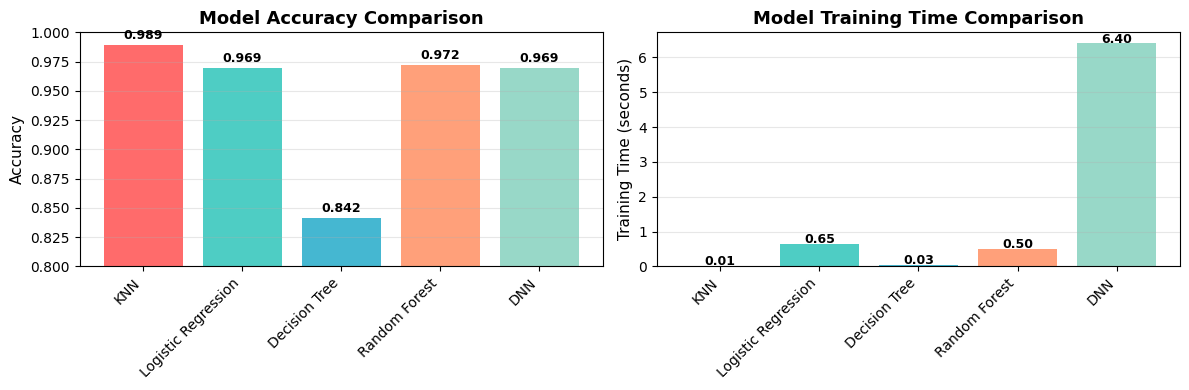

In [38]:
# ============================================================================
# 8. 성능 비교 그래프
# ============================================================================
models_list = list(results.keys())
accuracies = [results[m][0] for m in models_list]
times = [results[m][1] for m in models_list]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 정확도 비교
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
ax1.bar(models_list, accuracies, color=colors)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
ax1.set_ylim([0.8, 1.0])
ax1.grid(axis='y', alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.005, f'{v:.3f}', ha='center', fontsize=9, fontweight='bold')

# 학습시간 비교
ax2.bar(models_list, times, color=colors)
ax2.set_ylabel('Training Time (seconds)', fontsize=11)
ax2.set_title('Model Training Time Comparison', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
for i, v in enumerate(times):
    ax2.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()